In [1]:
import pandas as pd
import os
import numpy as np
import xarray as xr
import rioxarray as rioxr
import geopandas as gpd

pd.set_option('display.max_columns', None) 

In [4]:
# Filepath using OS for reproducibility
landsat_df = rioxr.open_rasterio(os.path.join('data', 
                                             'landsat8-2018-01-26-sb-simplified.nc'))

In [6]:
landsat_df.head()

<xarray.Dataset> Size: 1kB
Dimensions:      (band: 1, x: 5, y: 5)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 40B 1.213e+05 1.216e+05 ... 1.221e+05 1.224e+05
  * y            (y) float64 40B 3.952e+06 3.952e+06 ... 3.952e+06 3.951e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (band, y, x) float64 200B ...
    green        (band, y, x) float64 200B ...
    blue         (band, y, x) float64 200B ...
    nir08        (band, y, x) float64 200B ...
    swir22       (band, y, x) float64 200B ...

In [7]:
landsat_df.dtypes

Frozen({'red': dtype('float64'), 'green': dtype('float64'), 'blue': dtype('float64'), 'nir08': dtype('float64'), 'swir22': dtype('float64')})

In [17]:
landsat_df.rio.crs

CRS.from_epsg(32611)

##### Explore the data and write a brief summary of the information you obtained from the preliminary information. Your summary should include the a description of the data’s variables and dimensions.


The landsat data is an xarray.Dataset with 3 dimensions: band, x, and y. The band dimension has a length of 1 while both the x and y dimensions have lengths of 5. The data variables each show a different pieces that make up the false color imagery including, red, green, blue, nir08 (near infrared, and swir (shortwave infrared). The CRS is EPSG 32611.

In [15]:
# Drop the band dimension of the data
landsat_df = landsat_df.squeeze()

# Check the dataset
landsat_df

<xarray.Dataset> Size: 25MB
Dimensions:      (x: 870, y: 731)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (y, x) float64 5MB ...
    green        (y, x) float64 5MB ...
    blue         (y, x) float64 5MB ...
    nir08        (y, x) float64 5MB ...
    swir22       (y, x) float64 5MB ...

Without creating any new variables:

select the red, green, and blue variables (in that order) of the xarray.Dataset holding the Landsat data,
convert it to a numpy.array using the to_array() method, and then
use .plot.imshow() to create an RGB image with the data. There will be a warning, that’s ok.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


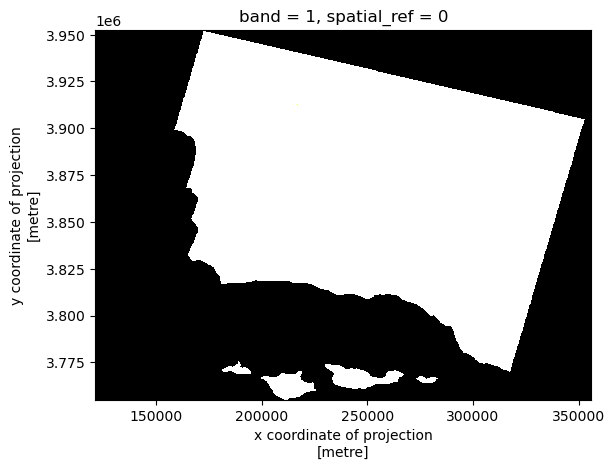

In [29]:
# Select red, green, and blue variables into an array and plot
landsat_df[['red', 'green', 'blue']].to_array().plot.imshow()